In [1]:
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
sys.path.append(r"Q:/sachuriga\Sachuriga_Python\spatial-maps")
import spatial_maps.maps as mapp
from examples.tracking_plot import plot_ratemap,plot_path
from spatial_maps.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from spatial_maps import maps
from spatial_maps.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num
from scipy.ndimage import gaussian_filter

\\forskning.it.ntnu.no\ntnu\mh-kin\quattrocolo\sachuriga\sachuriga_python\spatial-maps\examples\tracking_plot.py:5: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


Name: spatial-maps
Version: 0.1
Summary: 
Home-page: 
Author: 
Author-email: 
License: 
Location: \\forskning.it.ntnu.no\ntnu\mh-kin\quattrocolo\sachuriga\sachuriga_python\spatial-maps
Requires: astropy, elephant, matplotlib, numpy, pandas, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
## unit11: unit_num = 8, ch = 13
filepath = r"S:\Sachuriga/nwb/63383_2024-07-10_15-37-51_A_phy_k_manual.nwb"
npdata = nap.load_file(filepath)
npdata

63383_2024-07-10_15-37-51_A_phy_k_manual
┍━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━┑
│ Keys             │ Type     │
┝━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━┥
│ units            │ TsGroup  │
│ lfp_raw          │ TsdFrame │
│ lfp_car          │ TsdFrame │
│ Tail4_cords      │ TsdFrame │
│ Tail3_cords      │ TsdFrame │
│ Tail2_cords      │ TsdFrame │
│ Tail1_cords      │ TsdFrame │
│ XY               │ TsdFrame │
│ Snout_cords      │ TsdFrame │
│ Right_ear_cords  │ TsdFrame │
│ XY_mid_brain     │ TsdFrame │
│ Neck_cords       │ TsdFrame │
│ MD               │ TsdFrame │
│ Mid_brain_cords  │ TsdFrame │
│ Left_ear_cords   │ TsdFrame │
│ lfp_times        │ Tsd      │
│ BD               │ Tsd      │
│ Back4_cords      │ TsdFrame │
│ Back3_cords      │ TsdFrame │
│ Back2_cords      │ TsdFrame │
│ Back1_cords      │ TsdFrame │
│ ElectricalSeries │ TsdFrame │
┕━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━┙

c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\ts_group.py:492: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self._metadata[k] = np.asarray(v)
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\ts_group.py:492: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self._metadata[k] = np.asarray(v)
c:\Users\sachur\AppData\Local\anaconda3\envs\test1\Lib\site-packages\pynapple\core\ts_group.py:492: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0

\\forskning.it.ntnu.no\ntnu\mh-kin\quattrocolo\sachuriga\sachuriga_python\spatial-maps\examples\tracking_plot.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0

KeyError: 'Key 36 not in group index.'

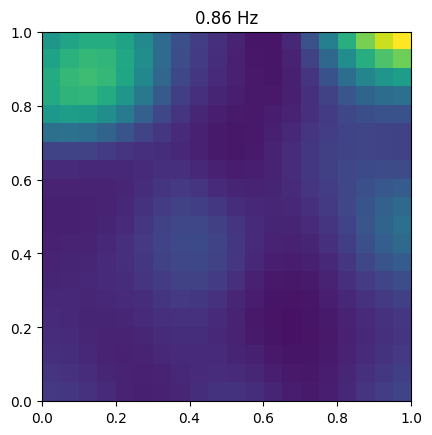

<Figure size 600x600 with 0 Axes>

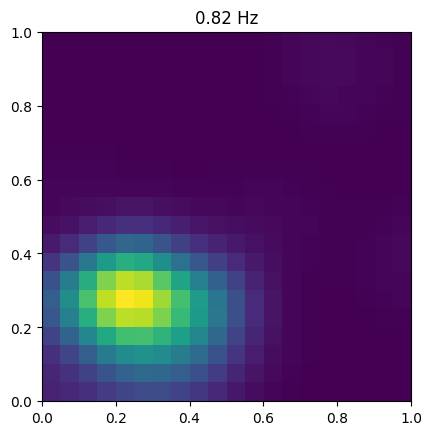

<Figure size 600x600 with 0 Axes>

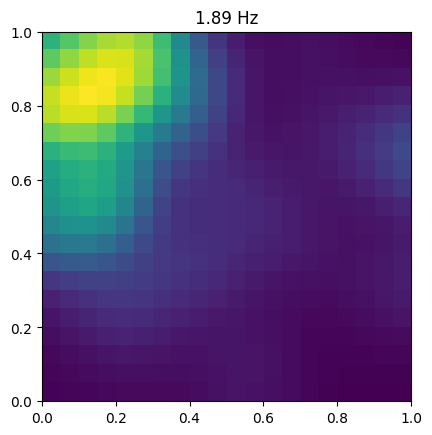

<Figure size 600x600 with 0 Axes>

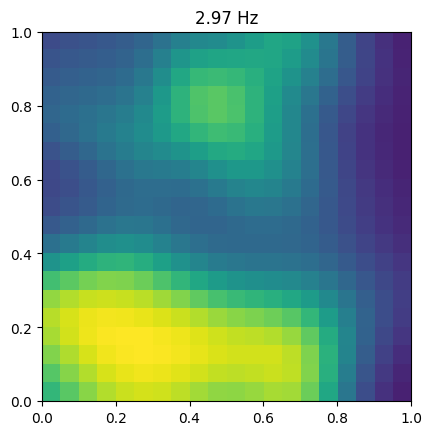

<Figure size 600x600 with 0 Axes>

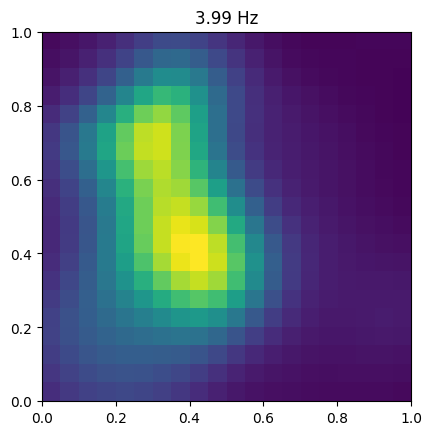

<Figure size 600x600 with 0 Axes>

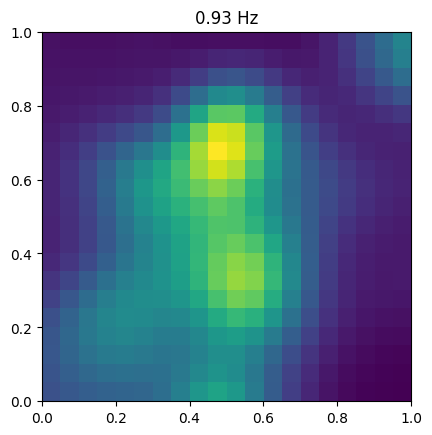

<Figure size 600x600 with 0 Axes>

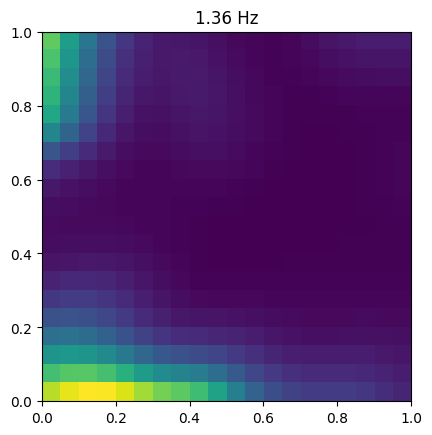

<Figure size 600x600 with 0 Axes>

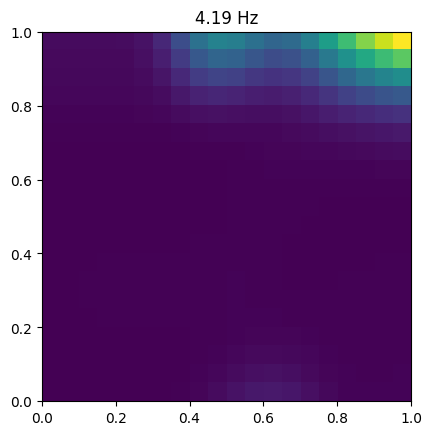

<Figure size 600x600 with 0 Axes>

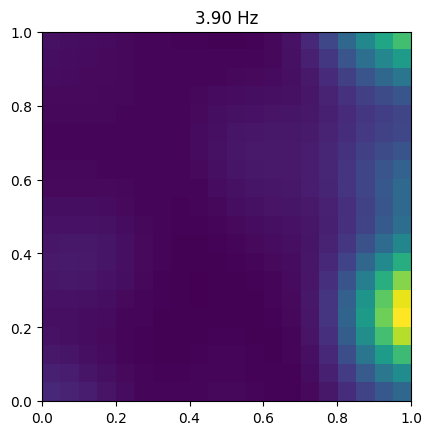

<Figure size 600x600 with 0 Axes>

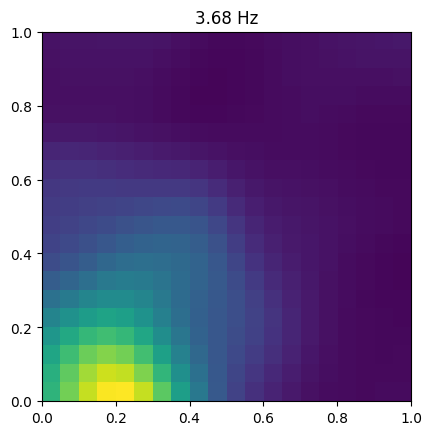

<Figure size 600x600 with 0 Axes>

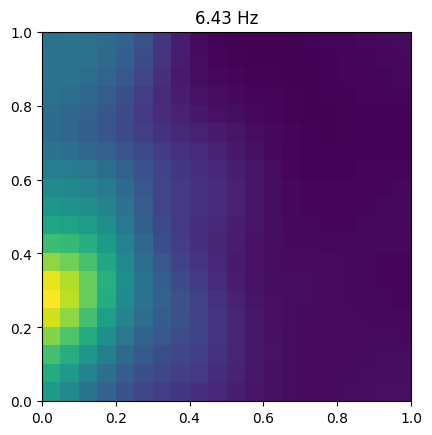

<Figure size 600x600 with 0 Axes>

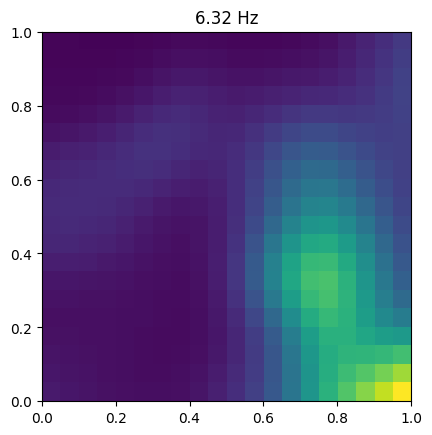

<Figure size 600x600 with 0 Axes>

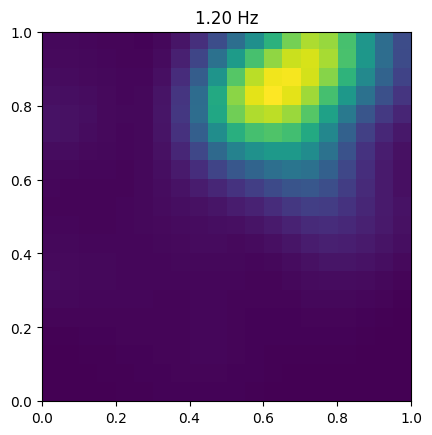

<Figure size 600x600 with 0 Axes>

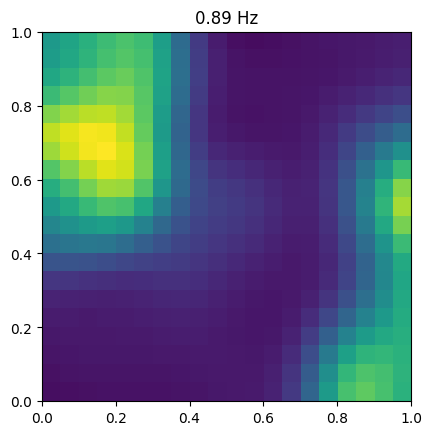

<Figure size 600x600 with 0 Axes>

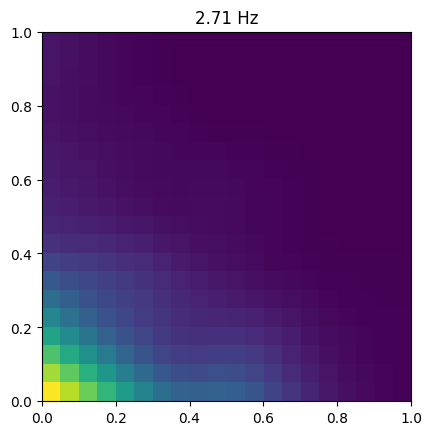

<Figure size 600x600 with 0 Axes>

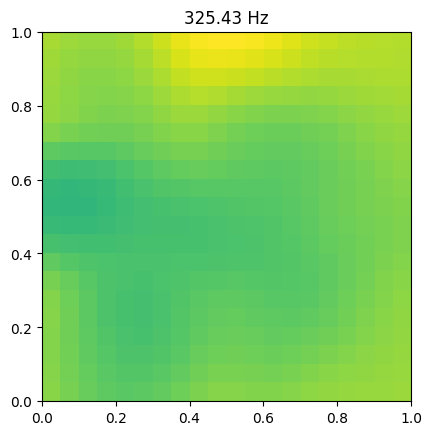

<Figure size 600x600 with 0 Axes>

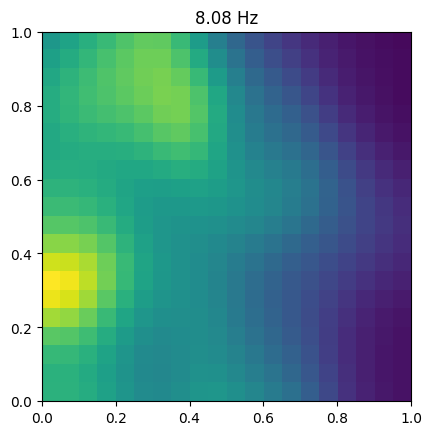

<Figure size 600x600 with 0 Axes>

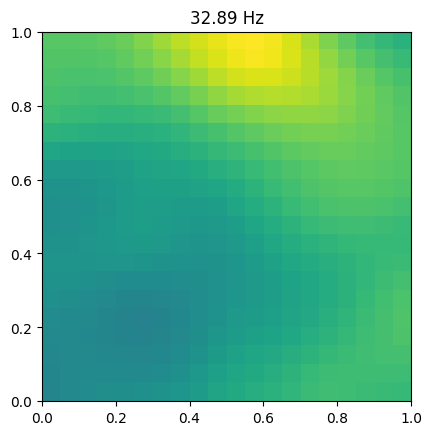

<Figure size 600x600 with 0 Axes>

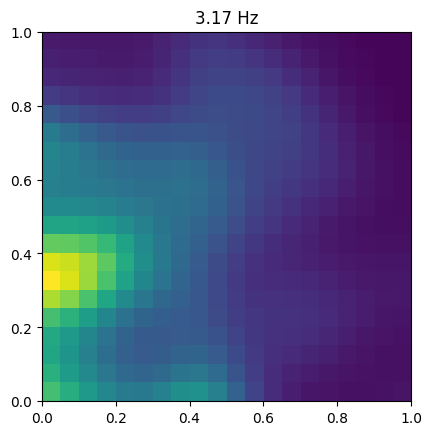

<Figure size 600x600 with 0 Axes>

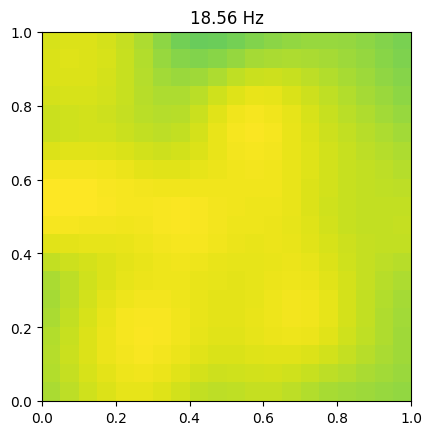

<Figure size 600x600 with 0 Axes>

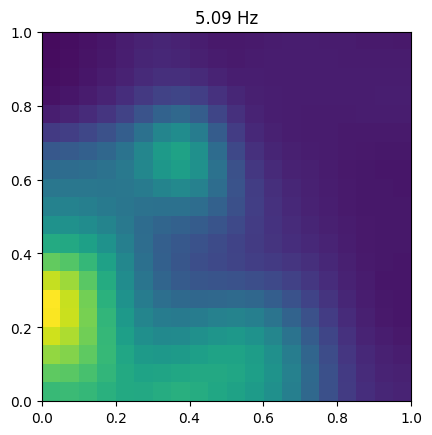

<Figure size 600x600 with 0 Axes>

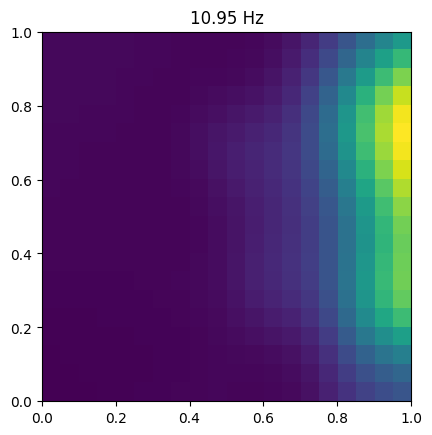

<Figure size 600x600 with 0 Axes>

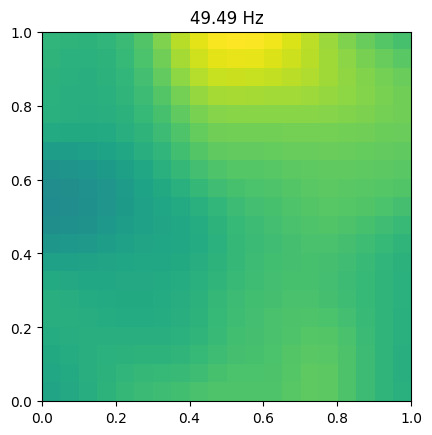

<Figure size 600x600 with 0 Axes>

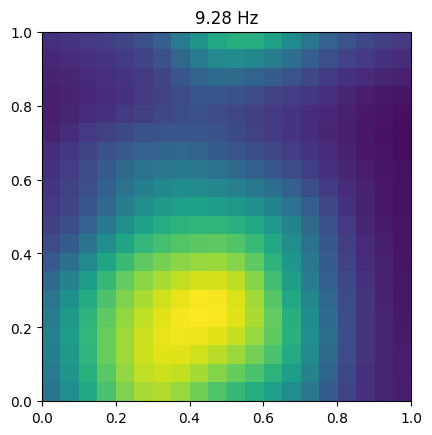

<Figure size 600x600 with 0 Axes>

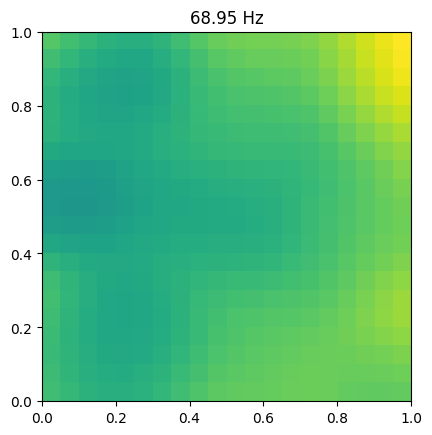

<Figure size 600x600 with 0 Axes>

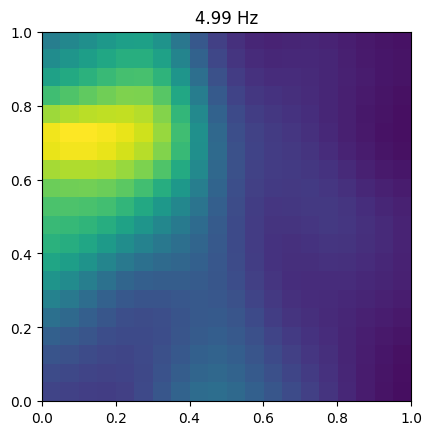

<Figure size 600x600 with 0 Axes>

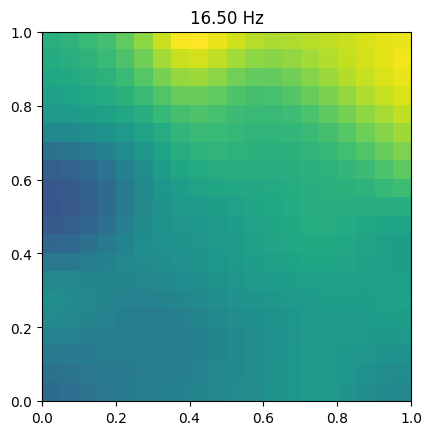

<Figure size 600x600 with 0 Axes>

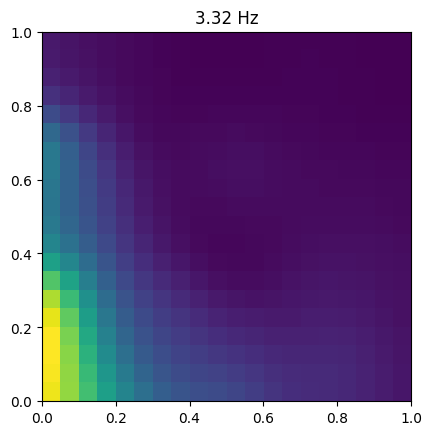

<Figure size 600x600 with 0 Axes>

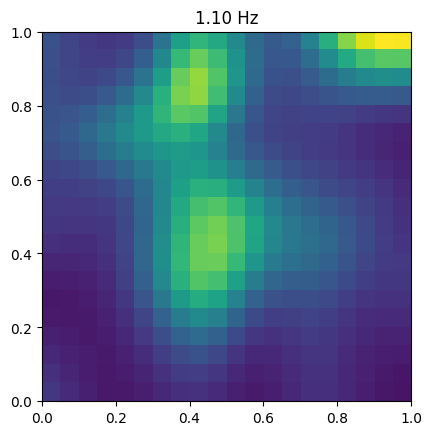

<Figure size 600x600 with 0 Axes>

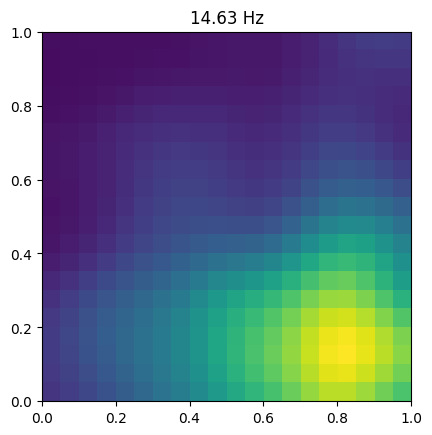

<Figure size 600x600 with 0 Axes>

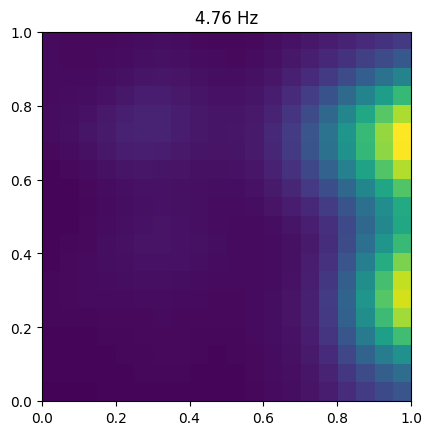

<Figure size 600x600 with 0 Axes>

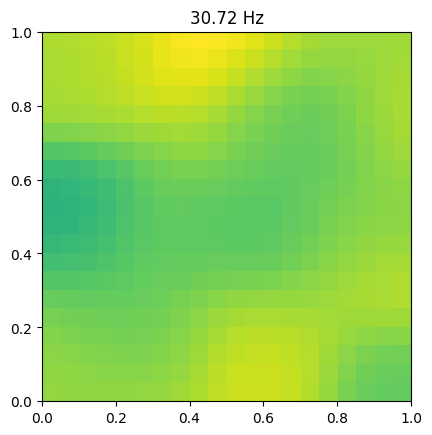

<Figure size 600x600 with 0 Axes>

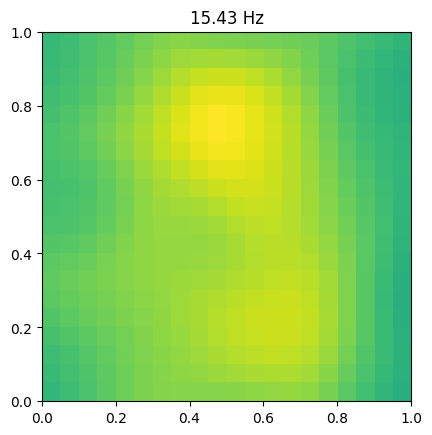

<Figure size 600x600 with 0 Axes>

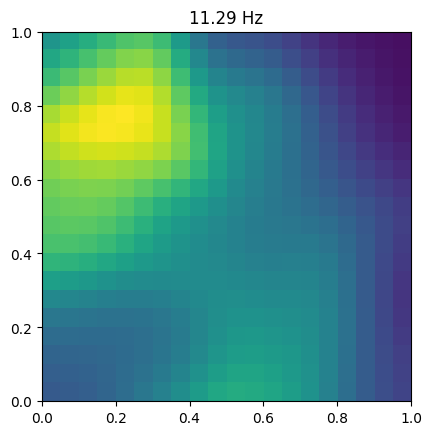

<Figure size 600x600 with 0 Axes>

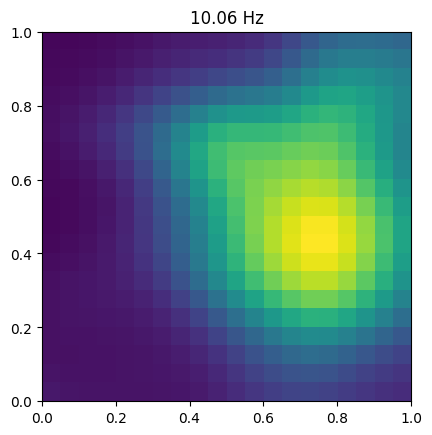

<Figure size 600x600 with 0 Axes>

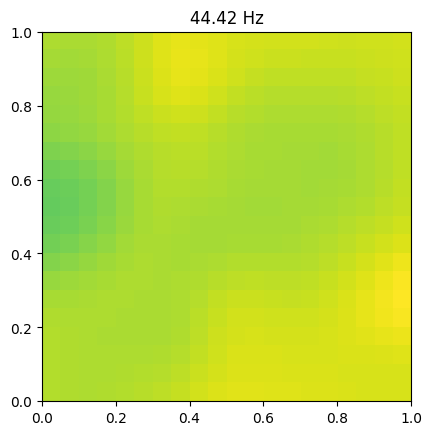

<Figure size 600x600 with 0 Axes>

In [3]:
## Load data
pos_cord = load_speed_fromNWB(npdata['XY_mid_brain'])


## filter speed
raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.05)

## filter spikes with speed


# ## filter spikes with speed
# spk = speed_filtered_spikes(spikes_time,
#                             pos_cord[:,0], # times
#                             mask)
unit_num = 14
for i in range(40):
    spikes_time = load_units_fromNWB(npdata['units'], unit_num = i)
    spk = speed_filtered_spikes(spikes_time,
                                raw_pos[:,0])

    plot_ratemap(raw_pos[:,1], # x
                raw_pos[:,2], # y
                raw_pos[:,0], # times
                spikes_time,
                box_size=[1.0, 1.0], 
                bin_size=0.05,
                smoothing=0.1)

In [74]:
len(spk)

45612

In [5]:
import pandas as pd
import ast
import pandas as pd

# File path
file_path = r"Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp/ASSY-236-F.prb"

# Read the file and parse the dictionary
with open(file_path, 'r') as file:
    # If the file starts with "channel_groups =", strip it
    content = file.read().replace("channel_groups =", "").strip()
    channel_groups = ast.literal_eval(content)

# Now channel_groups contains the dictionary
print("Loaded channel_groups:", channel_groups)

# Assuming channel_groups is loaded from Step 1
data = []
for group_id, group_data in channel_groups.items():
    channels = group_data['channels']
    geometry = group_data['geometry']
    for channel in channels:
        x, y = geometry[channel]
        data.append({
            'group_id': group_id,
            'channel_id': channel,
            'x': x,
            'y': y
        })

# Create a DataFrame
df = pd.DataFrame(data)

# Sort by group_id and channel_id for clarity (optional)
df = df.sort_values(by=['group_id', 'channel_id']).reset_index(drop=True)

# Function to find the nearest channel_id given x and y coordinates
def find_nearest_channel_id(x, y, dataframe):
    # Calculate Euclidean distance from input (x, y) to all points in the DataFrame
    distances = np.sqrt((dataframe['x'] - x)**2 + (dataframe['y'] - y)**2)
    # Find the index of the minimum distance
    nearest_idx = distances.idxmin()
    # Return the channel_id at that index
    return dataframe.loc[nearest_idx, 'channel_id'], distances[nearest_idx]

# Example usage with your input
x_input = npdata['units']['x'][unit_num]
y_input = npdata['units']['y'][unit_num]

channel_id, distance = find_nearest_channel_id(x_input, y_input, df)
print(f"Nearest Channel ID for (x={x_input}, y={y_input}) is: {channel_id}")
print(f"Distance to nearest point: {distance}")

# Optionally print the full DataFrame for reference
print("\nFull DataFrame:")
print(df)

Loaded channel_groups: {0: {'channels': [26, 25, 20, 19, 14, 8, 5, 4, 3, 0], 'geometry': {26: [16.5, 105.0], 25: [0.0, 0.0], 20: [0.0, 90.0], 19: [16.5, 135.0], 14: [16.5, 45.0], 8: [0.0, 60.0], 5: [16.5, 75.0], 4: [16.5, 15.0], 3: [0.0, 120.0], 0: [0.0, 30.0]}}, 1: {'channels': [30, 24, 22, 21, 17, 16, 9, 10, 6, 2, 1], 'geometry': {30: [216.5, 45.0], 24: [200.0, 90.0], 22: [200.0, 30.0], 21: [216.5, 75.0], 17: [216.5, 135.0], 16: [200.0, 120.0], 9: [216.5, 15.0], 10: [200.0, 60.0], 6: [216.5, 105.0], 2: [200.0, 150.0], 1: [200.0, 0.0]}}, 2: {'channels': [29, 28, 31, 27, 23, 18, 15, 13, 12, 11, 7], 'geometry': {29: [400.0, 30.0], 28: [416.5, 75.0], 31: [400.0, 120.0], 27: [400.0, 150.0], 23: [400.0, 90.0], 18: [416.5, 135.0], 15: [400.0, 60.0], 13: [400.0, 0.0], 12: [416.5, 105.0], 11: [416.5, 45.0], 7: [416.5, 15.0]}}, 3: {'channels': [33, 32, 45, 40, 36, 53, 50, 48, 47, 58, 56], 'geometry': {33: [600.0, 30.0], 32: [616.5, 75.0], 45: [600.0, 90.0], 40: [616.5, 15.0], 36: [600.0, 150.0

here
[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


<Axes: title={'center': '3.99 Hz'}>

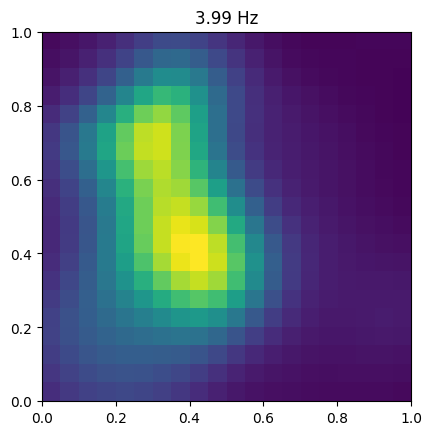

<Figure size 600x600 with 0 Axes>

In [4]:
## Load data
pos_cord = load_speed_fromNWB(npdata['XY_mid_brain'])


## filter speed
raw_pos,combined_array, mask,speeds,smoothed_speed,filtered_speed = pos2speed(pos_cord[:,0], # times
                            pos_cord[:,1], # x
                            pos_cord[:,2], # y
                            filter_speed=True, 
                            min_speed = 0.05)

## filter spikes with speed
unit_num=4

# ## filter spikes with speed
# spk = speed_filtered_spikes(spikes_time,
#                             pos_cord[:,0], # times
#                             mask)
#for i in range(40):
spikes_time = load_units_fromNWB(npdata['units'], unit_num = unit_num)
spk = speed_filtered_spikes(spikes_time,
                            raw_pos[:,0])
plot_ratemap(raw_pos[:,1], # x
            raw_pos[:,2], # y
            raw_pos[:,0], # times
            spikes_time ,
            box_size=[1.0, 1.0], 
            bin_size=0.05,
            smoothing=0.1)

In [6]:
import spatial_maps.maps as mapp
## get rate_maps
maps = mapp.SpatialMap(box_size=[1.0, 1.0], 
                       bin_size=0.05,
                       smoothing=0.1)

# rate_map = maps.rate_map(pos[:,1], 
#                          pos[:,2], 
#                          pos[:,0], 
#                          spikes_time)
# ## get_fileds with center of the files


rate_map = maps.rate_map(raw_pos[:,1], 
                        raw_pos[:,2], 
                         raw_pos[:,0], 
                         spikes_time)
## get_fileds with center of the files

fields = separate_fields_by_laplace(rate_map, 
                                    minimum_field_area=9)

fiesld_afremoval = remove_fields_by_area(fields, minimum_field_area=9)
bc = calculate_field_centers(rate_map, fiesld_afremoval, center_method='center_of_mass')
v = get_filed_num(fiesld_afremoval)
v

for field_nums in v:

    y_c = bc[field_nums-1][0]
    x_c = bc[field_nums-1][1]



[1.0, 1.0]
bins zie[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [7]:
f = which_field(raw_pos[:,1],raw_pos[:,2],fiesld_afremoval,[1.0,1.0])
f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
f = which_field(raw_pos[:,1],raw_pos[:,2],fiesld_afremoval,[1.0,1.0])

in_field = np.where(f==1)[0]
en,ex = compute_crossings(in_field)
pos_cord=raw_pos
xf = pos_cord[:,1][in_field]
yf = pos_cord[:,2][in_field]
tf = pos_cord[:,0][in_field]#
spk_in = spk[in_field-1]

indices = np.zeros(len(pos_cord[:,1]))
indices[in_field]=1

en,ex = compute_crossings(indices)
filter_loger_runs = ex-en
filtered_enter = en[filter_loger_runs>9]
filtered_exit = ex[filter_loger_runs>9]
ex


array([  934,  1958,  2322,  2487,  3525,  3859,  4023,  4469,  4591,
        4919,  5936,  6767,  6827,  7003,  7372,  7623,  8399,  8500,
        8549,  8974,  9273,  9363,  9406,  9436, 11836, 13756, 14495,
       14843, 15187, 15380, 15858, 15882, 16556, 18860, 20206, 20232,
       20270, 20863, 20875, 21128, 21970, 22308, 22491, 22688, 22848,
       24154, 24428, 24820, 25100, 25139, 26223, 28650, 28799, 28805,
       29870, 33748, 33998, 34956, 34992, 35108, 35931, 36525, 36536,
       36551, 36874, 37819, 38030, 38042, 38117, 38324, 38356, 38371,
       38687, 39215], dtype=int64)

In [9]:
lfp_times = npdata['lfp_times']
lfp = npdata['lfp_raw']
#theta_phase = np.load(r'Q:/sachuriga/Sachuriga_Python/tSC_sachur/data/65588-20240308_1.theta.phase.13')

In [10]:
import numpy as np
from scipy import signal
from scipy.signal import hilbert
import matplotlib.pyplot as plt

fs = 1000
# 1. 带通滤波 (6-11 Hz)
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)  # 前后向滤波，避免相位移
    return y

lfp_filtered = bandpass_filter(lfp[:,channel_id], 5, 12, fs)

# 2. 使用希尔伯特变换计算瞬时相位
analytic_signal = hilbert(lfp_filtered)

# 计算相位（弧度）
phase_rad = np.angle(analytic_signal)

# 展开相位，避免-π到π的跳跃
phase_rad_unwrapped = np.unwrap(phase_rad)

# 转换为角度
phase_deg = phase_rad_unwrapped * (180 / np.pi)

# 调整到0°到720°范围（取决于信号长度和周期）
# 如果需要限制在0°到720°，可以用模运算或其他逻辑
theta_phase = phase_deg % 360 # 取模720，或者根据需求自定义

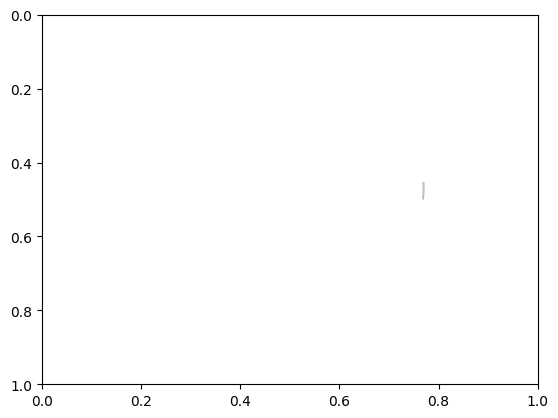

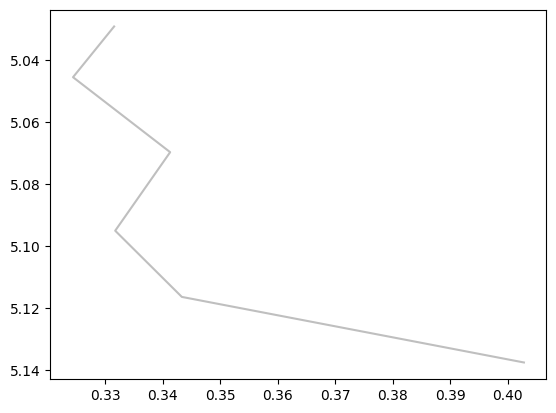

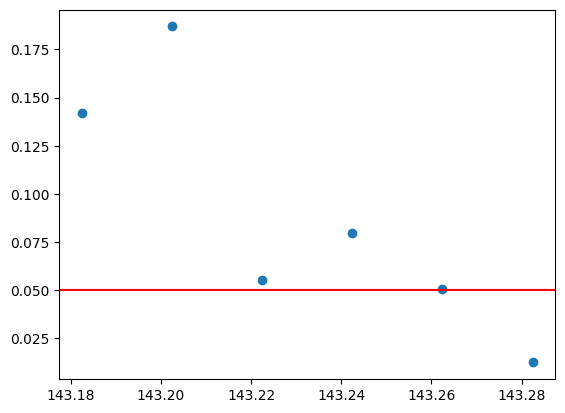

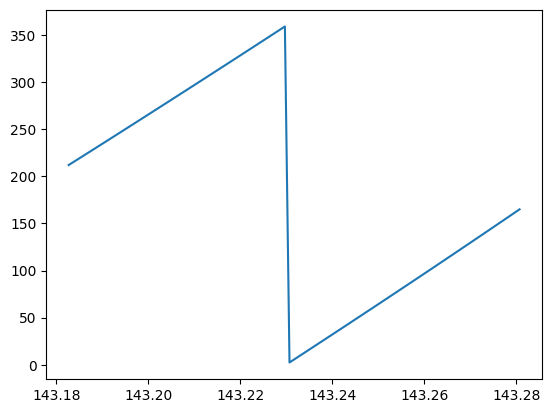

In [11]:
# x = pos[:,1]
# y = pos[:,2]
# t = pos[:,0]
x = pos_cord[:,1]
y = pos_cord[:,2]
t = pos_cord[:,0]


fig, ax = plt.subplots()
plt.xlim(0, 1)
plt.ylim(0, 1)
fig, ax1= plt.subplots()

slide_s=en[2]
slide_stop=ex[2]
plot_path(x[slide_s:slide_stop],y[slide_s:slide_stop],t[slide_s:slide_stop],box_size=1,spike_times = spikes_time, ax=ax)
r, theta, pdcd, pdmd = map_pass_to_unit_circle(x[slide_s:slide_stop],y[slide_s:slide_stop],t[slide_s:slide_stop], x_c/20,y_c/20, field=fiesld_afremoval, box_size=[1.0, 1.0])
x_r = pdcd * np.cos(theta)
# #print(len(r),len(theta))
y_r = pdcd * np.sin(theta)
#ax1.plot(pdcd,theta)
plot_path(pdcd,theta,t[slide_s:slide_stop],box_size=1,spike_times = spikes_time, ax=ax1)

fig, ax2= plt.subplots()
plt.scatter(t[slide_s:slide_stop],smoothed_speed[slide_s:slide_stop])
plt.axhline(y=0.05, color='r', linestyle='-')

fig, ax2= plt.subplots()
start = t[slide_s:slide_stop][0]
stop = t[slide_s:slide_stop][-1]

start_index = np.searchsorted(lfp_times, start, side='left')
stop_index = np.searchsorted(lfp_times, stop, side='right') - 1
plt.plot(lfp_times[start_index:stop_index],theta_phase[start_index:stop_index])


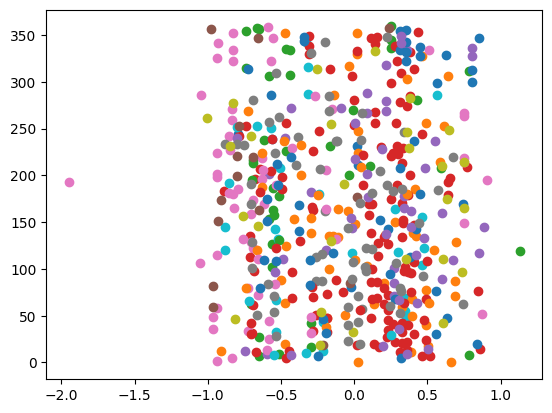

In [12]:
fig, ax3 = plt.subplots()
full_phase=[]
full_x=[]
for slide_s,slide_stop in zip(filtered_enter,filtered_exit):
    plot_path(x[slide_s:slide_stop],y[slide_s:slide_stop],t[slide_s:slide_stop],box_size=1,spike_times = spikes_time, ax=ax)
    r, theta, pdcd, pdmd = map_pass_to_unit_circle(x[slide_s:slide_stop],y[slide_s:slide_stop],t[slide_s:slide_stop], x_c/20, y_c/20, field=fiesld_afremoval, box_size=[1.0, 1.0])
    phase_value=[]

    temp_time = t[slide_s:slide_stop]
    temp = spikes_time[spikes_time>t[slide_s]]
    temp1 = temp[temp<=t[slide_stop-1]]
    phase_value=[]
    pdcd_temp = []
    if len(temp1)>0:
        for t1 in temp1:
            index_run = np.searchsorted(temp_time, t1)
            index_theta = np.searchsorted(lfp_times, t1)
            phase_value.append(theta_phase[index_theta])
            pdcd_temp.append(pdcd[index_run-1])
            full_phase.append(theta_phase[index_theta])
            full_x.append(pdcd[index_run-1])
        ax3.scatter(pdcd_temp,phase_value)
            

In [13]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

# 步骤 1：将尖峰分到1°的bin中
bins = np.arange(0, 360, 1)  # 360个bin，从0°到359°
hist, bin_edges = np.histogram(full_phase, bins=bins, range=(0, 360))

# 步骤 2：用圆形高斯滤波器平滑
# 因为是循环数据，重复首尾以处理边界
hist_circular = np.concatenate([hist[-180:], hist, hist[:180]])  # 扩展数据
sigma = 45  # 标准差45°
hist_smoothed = gaussian_filter1d(hist_circular, sigma=sigma)  # 平滑

# 步骤 3：找到最小尖峰数的相位
min_phase_idx = np.argmin(hist_smoothed)  # 最小值的索引
phase_zero = bins[min_phase_idx]  # 定义为相位零点
print(f"Phase zero (minimum firing phase): {phase_zero}°")

# 可选：调整相位（如果需要）
# 如果想把所有相位相对于 phase_zero 重新定义
adjusted_phases = (full_phase - phase_zero) % 360

Phase zero (minimum firing phase): 0°


In [50]:
full_phase

[47.486136214691214,
 202.49141564191086,
 164.21093783294782,
 204.37120343453716,
 173.33861942321528,
 338.36782405141275,
 355.05136533954646,
 2.325144530273974,
 9.67963396338746,
 19.61623709840933,
 287.43403570126975,
 168.78103679063497,
 181.55412104696734,
 209.94189812685363,
 68.29515271185664,
 84.94265974831069,
 144.88457706244662,
 209.3025871887221,
 232.4916505451547,
 137.48608150909422,
 190.5883897280437,
 208.9763527449686,
 271.9390651602298,
 283.6982124479837,
 32.25214619736653,
 62.76875596086029,
 136.1123355050222,
 203.93797053885646,
 51.08078200032469,
 77.6856490263599,
 94.34079905954422,
 216.58754378301091,
 245.82455107121496,
 284.51752656599274,
 10.84366306924494,
 157.94809729751432,
 235.26371968502644,
 127.58920817566104,
 180.00105218106182,
 164.71927383780712,
 201.2949721539626,
 260.51997883053264,
 85.58415769395651,
 194.45900544925826,
 230.14630562416278,
 37.167587134288624,
 173.36300011741696,
 296.68926378391916,
 253.115570337

(-1.0, 1.0)

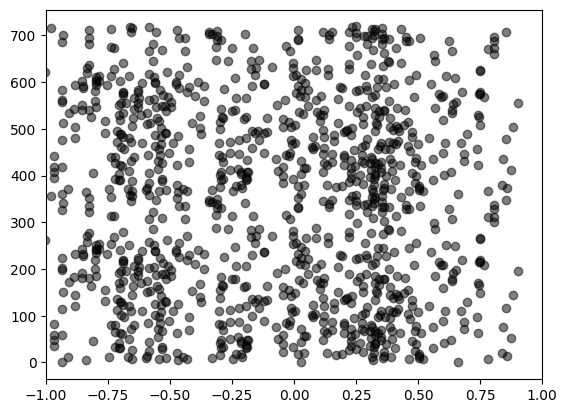

In [14]:
fig, ax4 = plt.subplots()
ax4.scatter(full_x,adjusted_phases,c='k', alpha=0.5)

ax4.scatter(full_x,adjusted_phases+360,c='k', alpha=0.5)
plt.xlim(-1, 1) 
            

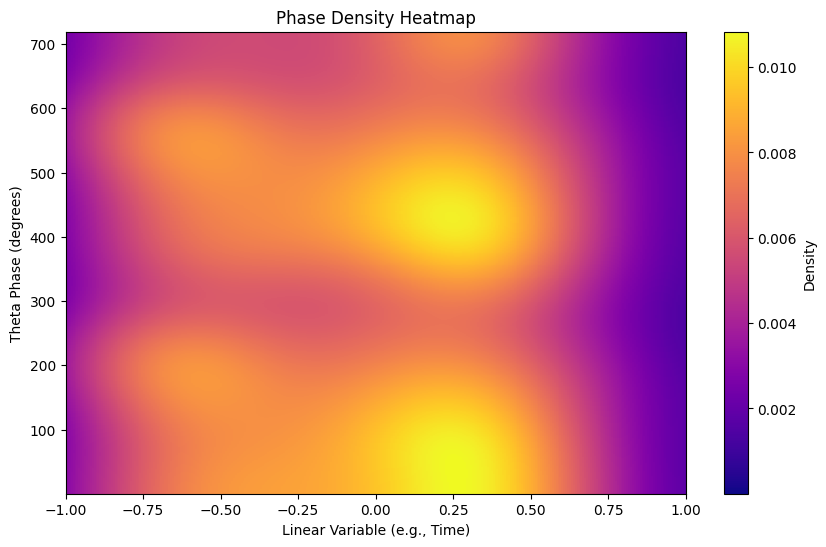

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# 计算二维直方图
#x_bins = np.linspace(min(lin_x), max(lin_x), 50)  # x轴分成50个bin
#y_bins = np.linspace(0, 360, 50)  # 相位分成50个bin（0°-360°）
full_x_stacked = np.hstack([full_x, full_x])
full_adjusted_phases = np.hstack([adjusted_phases, adjusted_phases+360])
heatmap, xedges, yedges = np.histogram2d(full_x_stacked,full_adjusted_phases, bins=[500, 500])

# 可选：平滑热图（可选，去掉注释使用）
from scipy.ndimage import gaussian_filter
heatmap = gaussian_filter(heatmap, sigma=40)

# 绘制热图
plt.figure(figsize=(10, 6))
plt.pcolormesh(xedges, yedges, heatmap.T, cmap='plasma')  # heatmap.T转置以匹配方向
plt.colorbar(label='Density')  # 添加颜色条表示密度
plt.xlabel('Linear Variable (e.g., Time)')
plt.ylabel('Theta Phase (degrees)')
plt.title('Phase Density Heatmap')
plt.xlim(-1, 1) 
plt.show()


(1396,)

In [ ]:
fig, ax = plt.subplots()
ax.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
fig, ax1 = plt.subplots()
ax1.axis('equal')
for slide_s,slide_stop in zip(filtered_enter,filtered_exit):
    plot_path(x[slide_s:slide_stop],y[slide_s:slide_stop],t[slide_s:slide_stop],box_size=1,spike_times = spikes_time, ax=ax)
    r, theta, pdcd, pdmd = map_pass_to_unit_circle(x[slide_s:slide_stop],y[slide_s:slide_stop],t[slide_s:slide_stop], x_c/20, y_c/20, field=fiesld_afremoval, box_size=[1.0, 1.0])

    x_r = r * np.cos(theta)
    y_r = r * np.sin(theta)
    plot_path(x_r,y_r,t[slide_s:slide_stop],box_size=1,spike_times = spikes_time, ax=ax1)

    #ax1.axis('equal')
    #plt.bar(tf[slide_s:slide_stop],xf[slide_s:slide_stop])

    # xr = xf[slide_s:slide_stop]
    # yr = yf[slide_s:slide_stop]
    # tr = tf[slide_s:slide_stop]

    # # r, theta, pdcd, pdmd = map_pass_to_unit_circle(xr, yr, tr, x_c/100, y_c/100, field=fiesld_afremoval, box_size=[1.0, 1.0])

    # # plt.figure()
    # # plt.plot(tr,pdcd)

In [ ]:
import os
import cv2

# Specify the directory path
folder_path = r"S:\Sachuriga/Ephys_Vedio/CR_CA1/pytorch_model"

# Ensure the directory exists
if not os.path.exists(folder_path):
    print(f"Directory {folder_path} does not exist.")
    exit()

# List all .avi files in the directory
avi_files = [f for f in os.listdir(folder_path) if f.endswith('.avi')]

if not avi_files:
    print("No .avi files found in the specified folder.")
else:
    print("Processing .avi files:")
    for avi_file in avi_files:
        # Get the first five letters of the file name
        first_five_letters = avi_file[:5]

        # Full path to the video file
        video_path = os.path.join(folder_path, avi_file)

        # Open the video file using OpenCV
        video = cv2.VideoCapture(video_path)

        # Check if the video opened successfully
        if not video.isOpened():
            print(f"Error: Could not open video {avi_file}")
            continue

        # Get the total number of frames
        total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

        # Release the video object
        video.release()

        # Print the results
        print(f"File: {avi_file}")
        print(f"First five letters: {first_five_letters}")
        print(f"Total frames: {total_frames}")
        print("-" * 30)

print("Processing complete.")

File: 63383_Open_Field_50Hz_A2024-07-18T14_13_16.avi
Animal number: 63383
Recording day: 2024-07-18
Recording session: A
Total frames: 59875
Constructed target folder: S:\Sachuriga\Ephys_Recording\CR_CA1\63383\63383_2024-07-18_14_A
--------------------------------------------------
Target folder does not exist: S:\Sachuriga\Ephys_Recording\CR_CA1\63383\63383_2024-07-18_14_A
Processing complete.


In [56]:
import os
import cv2
from datetime import datetime

# Base folder containing the .avi file
base_folder = r"S:\Sachuriga\Ephys_Vedio\CR_CA1\pytorch_model"
avi_file_name = "63383_Open_Field_50Hz_A2024-07-18T14_13_16.avi"
full_avi_path = os.path.join(base_folder, avi_file_name)

# Target base folder to construct or match
target_base = r"S:\Sachuriga\Ephys_Recording\CR_CA1"

# Function to extract components from .avi file name
def extract_components(file_name):
    parts = file_name.split("_")
    
    # Animal number: First five letters
    animal_number = file_name[:5]
    
    # Recording day: Look for date pattern (e.g., 2024-07-18)
    recording_day = None
    for part in parts:
        if "2024" in part:  # Assuming year as a marker
            try:
                dt = datetime.strptime(part.split("T")[0], "A%Y-%m-%d")
                recording_day = dt.strftime("%Y-%m-%d")
                break
            except ValueError:
                continue
    
    # Recording session: Look for uppercase A, B, or C
    recording_session = None
    for part in parts:
        if part in ["A", "B", "C"]:
            recording_session = part
            break
    if not recording_session:
        # Fallback: Check if 'A' precedes the date
        if "A2024" in file_name:
            recording_session = "A"

    return animal_number, recording_day, recording_session

# Function to construct target folder
def construct_target_folder(target_base, animal_number, recording_day, recording_session, time_str="14-13-10"):
    # Assuming time might vary slightly; using a placeholder or extracted time if available
    folder_name = f"{animal_number}_{recording_day}_{time_str}_{recording_session}"
    return os.path.join(target_base, animal_number, folder_name)

# Process the .avi file
if not os.path.exists(base_folder):
    print(f"Base folder {base_folder} does not exist.")
    exit()

if not os.path.exists(full_avi_path):
    print(f"File {full_avi_path} not found.")
else:
    # Extract components
    animal_number, recording_day, recording_session = extract_components(avi_file_name)
    
    # Open the video file using OpenCV
    video = cv2.VideoCapture(full_avi_path)
    if not video.isOpened():
        print(f"Error: Could not open video {avi_file_name}")
    else:
        # Get the total number of frames
        total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        video.release()

        # Extract time for target folder (approximate match)
        time_part = "14-13-10"  # Placeholder; could refine with exact time parsing if needed
        for part in avi_file_name.split("_"):
            if "T" in part:
                time_part = part.split("T")[1].replace("_", "-")[:8]  # e.g., 14_13_16 -> 14-13-16
                break

        # Construct the target folder
        target_folder = construct_target_folder(target_base, animal_number, recording_day, recording_session, time_part)

        # Print results
        print(f"File: {avi_file_name}")
        print(f"Animal number: {animal_number}")
        print(f"Recording day: {recording_day}")
        print(f"Recording session: {recording_session}")
        print(f"Total frames: {total_frames}")
        print(f"Constructed target folder: {target_folder}")
        print("-" * 50)

        # Optional: Check if the target folder exists
        if os.path.exists(target_folder):
            print(f"Target folder exists: {target_folder}")
        else:
            print(f"Target folder does not exist: {target_folder}")

print("Processing complete.")

File: 63383_Open_Field_50Hz_A2024-07-18T14_13_16.avi
Animal number: 63383
Recording day: 2024-07-18
Recording session: A
Total frames: 59875
Constructed target folder: S:\Sachuriga\Ephys_Recording\CR_CA1\63383\63383_2024-07-18_14_A
--------------------------------------------------
Target folder does not exist: S:\Sachuriga\Ephys_Recording\CR_CA1\63383\63383_2024-07-18_14_A
Processing complete.
